In [1]:
library(clusterProfiler)
library(org.Mm.eg.db)
library(ggplot2)




clusterProfiler v4.12.2 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, doi:10.1038/s41596-024-01020-z


Attaching package: 'clusterProfiler'


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmi

In [3]:
# Gene lists (assuming these are already read)
nr1d1_genes <- readLines("nr1d1_uniq_ID.txt")
hdac3_genes <- readLines("hdac3_uniq_ID.txt")
nfil3_genes <- readLines("nfil3_uniq_ID.txt")

nr1d1_genes

[1] "CycID"         "0610007C21Rik" "0610007N19Rik" "0610007P08Rik"
  [5] "0610008F07Rik" "0610009B22Rik" "1110003E01Rik" "1110020A21Rik"
  [9] "1110021J02Rik" "1110031I02Rik" "1110046J04Rik" "1110059G10Rik"
 [13] "1200011M11Rik" "1600002K03Rik" "1600012F09Rik" "1700025G04Rik"
 [17] "1700030K09Rik" "1700031P21Rik" "1700034H14Rik" "1700052K11Rik"
 [21] "1700084J12Rik" "1700120E14Rik" "1810012P15Rik" "1810037I17Rik"
 [25] "2010001E11Rik" "2010016I18Rik" "2010107G23Rik" "2010300C02Rik"
 [29] "2010320M18Rik" "2210010C17Rik" "2310035K24Rik" "2310037I24Rik"
 [33] "2610001J05Rik" "2610029G23Rik" "2810004N23Rik" "2810013P06Rik"
 [37] "2810021J22Rik" "3830406C13Rik" "4732418C07Rik" "4930430J02Rik"
 [41] "4930473A06Rik" "4930511M06Rik" "4930562F07Rik" "4933411K16Rik"
 [45] "4933421O10Rik" "5730455P16Rik" "5730469M10Rik" "5730577I03Rik"
 [49] "5830433M19Rik" "8430408G22Rik" "8430429K09Rik" "9030617O03Rik"
 [53] "9130011J15Rik" "9530027J09Rik" "9630033F20Rik" "A430105I19Rik"
 [57] "A630055G03Rik" "A630066F11Rik" "AA415398"      "AI427809"     
 [61] "AI506816"      "AI597479"      "AW555464"      "Aaas"         
 [65] "Aamp"          "Aarsd1"        "Abcc5"         "Abi3"         
 [69] "Ablim1"        "Acap1"         "Acap3"         "Acp1"         
 [73] "Acss1"         "Actr5"         "Actr8"         "Adc"          
 [77] "Ado"           "Adora2a"       "Agap2"         "Agphd1"       
 [81] "Agps"          "Aldh6a1"       "Alg1"          "Als2cr4"      
 [85] "Ammecr1"       "Ampd2"         "Anapc1"        "Angptl6"      
 [89] "Anks1"         "Ano7"          "Ano8"          "Ap1g1"        
 [93] "Aqr"           "Arf2"          "Arf5"          "Arfip1"       
 [97] "Arfip2"        "Arhgap10"      "Arhgap22"      "Arhgef10"     
[101] "Arhgef15"      "Arl6ip1"       "Armc1"         "Arv1"         
[105] "Ascl3"         "Atp9b"         "Atpaf1"        "Atxn7l3"      
[109] "Avil"          "B9d1"          "BC003965"      "BC021767"     
[113] "BC024659"      "BC025920"      "BC029722"      "BC048546"     
[117] "BC048609"      "BC055324"      "Baiap3"        "Bcar3"        
[121] "Bco2"          "Blnk"          "Bola1"         "Brd9"         
[125] "C130074G19Rik" "C230052I12Rik" "Cab39l"        "Cables1"      
[129] "Cacng7"        "Calu"          "Camk2n2"       "Caml"         
[133] "Capn2"         "Car14"         "Car15"         "Carm1"        
[137] "Cbll1"         "Cbwd1"         "Ccdc106"       "Ccdc122"      
[141] "Ccdc41"        "Ccdc57"        "Ccdc68"        "Ccdc69"       
[145] "Ccdc90b"       "Ccdc92"        "Ccdc94"        "Ccl5"         
[149] "Ccnjl"         "Ccnyl1"        "Cd200r4"       "Cd27"         
[153] "Cd37"          "Cd38"          "Cd3e"          "Cd3g"         
[157] "Cd55"          "Cd7"           "Cd8a"          "Cdc5l"        
[161] "Cdkl3"         "Cdkn2d"        "Cebpb"         "Chmp7"        
[165] "Chrnb1"        "Cib2"          "Cideb"         "Clec4a1"      
[169] "Clip2"         "Cnnm3"         "Coasy"         "Coil"         
[173] "Col4a6"        "Copb2"         "Coq10a"        "Cox5a"        
[177] "Cox7a1"        "Cox7a2l"       "Cpne3"         "Cpox"         
[181] "Cpsf2"         "Cpsf6"         "Crem"          "Crym"         
[185] "Cspp1"         "Ctbp2"         "Ctdsp1"        "Ctns"         
[189] "Ctsl"          "Ctsw"          "Cyb5d1"        "Cyp4f13"      
[193] "Cyth4"         "D030056L22Rik" "D4Wsu53e"      "Dcakd"        
[197] "Dck"           "Ddi2"          "Ddx3x"         "Deaf1"        
[201] "Dennd2d"       "Dgcr6"         "Dgka"          "Dgkq"         
[205] "Dhx15"         "Dhx34"         "Dhx57"         "Dicer1"       
[209] "Dlg5"          "Dll1"          "Dnaja3"        "Dnase1"       
[213] "Dnm1l"         "Dnmt3a"        "Dock9"         "Dok4"         
[217] "Dpep1"         "Dpp4"          "Dpp8"          "Dtx1"         
[221] "Duoxa2"        "Dvl2"          "Dynll1"        "Ebi3"         
[225] "Edn2"          "Efna1"         "Ehd1"          "Eif1a"        
[229] "Eif3a

In [4]:
# Convert SYMBOL to ENTREZID
nr1d1_entrez <- bitr(nr1d1_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")
hdac3_entrez <- bitr(hdac3_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")
nfil3_entrez <- bitr(nfil3_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")

gene_clusters <- list(
  nr1d1 = nr1d1_entrez$ENTREZID,
  hdac3 = hdac3_entrez$ENTREZID,
  nfil3 = nfil3_entrez$ENTREZID
)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(nr1d1_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.11% of input gene IDs are fail to map..."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(hdac3_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.14% of input gene IDs are fail to map..."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(nfil3_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"10.7% of input gene IDs are fail to map..."


In [6]:
enrichGO_custom <- function(gene) {
enrichGO(gene, OrgDb = org.Mm.eg.db, keyType = "ENTREZID", 
           pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05)
}

# GO enrichment
ck <- compareCluster(geneCluster = gene_clusters, fun = enrichGO_custom)
ck <- setReadable(ck, OrgDb = org.Mm.eg.db, keyType = "ENTREZID")

In [8]:
head(ck,5)

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,nr1d1,GO:0019001,guanyl nucleotide binding,26/663,387/28396,1.741908e-06,0.0004825445,0.0004070957,Agap2/Arf2/Arf5/Dnm1l/Ehd1/Eral1/Gbp6/Gspt1/Gtpbp1/Gtpbp10/Gtpbp3/Gtpbp8/Kras/Mras/Pck1/Rab2b/Rab4a/Rac1/Rasl12/Rhob/Rhoc/Rhod/Slc19a1/Spag1/Srprb/Trim23,26
2,nr1d1,GO:0032561,guanyl ribonucleotide binding,26/663,387/28396,1.741908e-06,0.0004825445,0.0004070957,Agap2/Arf2/Arf5/Dnm1l/Ehd1/Eral1/Gbp6/Gspt1/Gtpbp1/Gtpbp10/Gtpbp3/Gtpbp8/Kras/Mras/Pck1/Rab2b/Rab4a/Rac1/Rasl12/Rhob/Rhoc/Rhod/Slc19a1/Spag1/Srprb/Trim23,26
3,nr1d1,GO:0005525,GTP binding,25/663,363/28396,1.763256e-06,0.0004825445,0.0004070957,Agap2/Arf2/Arf5/Dnm1l/Ehd1/Eral1/Gbp6/Gspt1/Gtpbp1/Gtpbp10/Gtpbp3/Gtpbp8/Kras/Mras/Pck1/Rab2b/Rab4a/Rac1/Rasl12/Rhob/Rhoc/Rhod/Spag1/Srprb/Trim23,25
4,nr1d1,GO:0043274,phospholipase binding,7/663,30/28396,4.674202e-06,0.0009593800,0.0008093750,Blnk/Dgkq/Lck/Prkcz/Src/Stxbp1/Syk,7
5,nr1d1,GO:0004842,ubiquitin-protein transferase activity,26/663,433/28396,1.301726e-05,0.0018330836,0.0015464697,Cbll1/Dtx1/Fbxw7/Klhl20/Med11/Med21/Nhlrc3/Nt5c2/Pdzrn3/Ring1/Rnf13/Rnf208/Rnf214/Smurf2/Trim23/Trim25/Trim27/Trim32/Trim72/Ube2g2/Ube2h/Ube2k/Ube2q1/Ubr2/Wwp1/Znrf3,26


In [16]:
subset_df <- subset(ck, Cluster == "hdac3")
subset_df

ERROR: Error in eval(expr, envir, enclos): object 'Cluster' not found


In [21]:
df_enr = as.data.frame(ck)

In [23]:
subset(df_enr, Cluster == "nfil3")

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
50,nfil3,GO:0016779,nucleotidyltransferase activity,9/316,136/28396,2.270973e-05,0.01396648,0.01152220,Cds2/Crcp/Ficd/Fpgt/Parp2/Parp3/Parp8/Pold4/Tut1,9
51,nfil3,GO:0015144,carbohydrate transmembrane transporter activity,5/316,38/28396,6.140776e-05,0.01888289,0.01557818,Aqp1/Slc23a1/Slc50a1/Slc5a11/Slc5a4a,5
52,nfil3,GO:0042578,phosphoric ester hydrolase activity,13/316,353/28396,1.826344e-04,0.03744006,0.03088765,Cdkn3/Enpp3/Enpp7/Gnaq/Hddc3/Impa2/Ppp2r5a/Ptk2/Ptpn1/Ptpn2/Ptprn2/Sacm1l/Ssh2,13
53,nfil3,GO:0051119,sugar transmembrane transporter activity,4/316,28/28396,2.495110e-04,0.03836232,0.03164851,Slc23a1/Slc50a1/Slc5a11/Slc5a4a,4


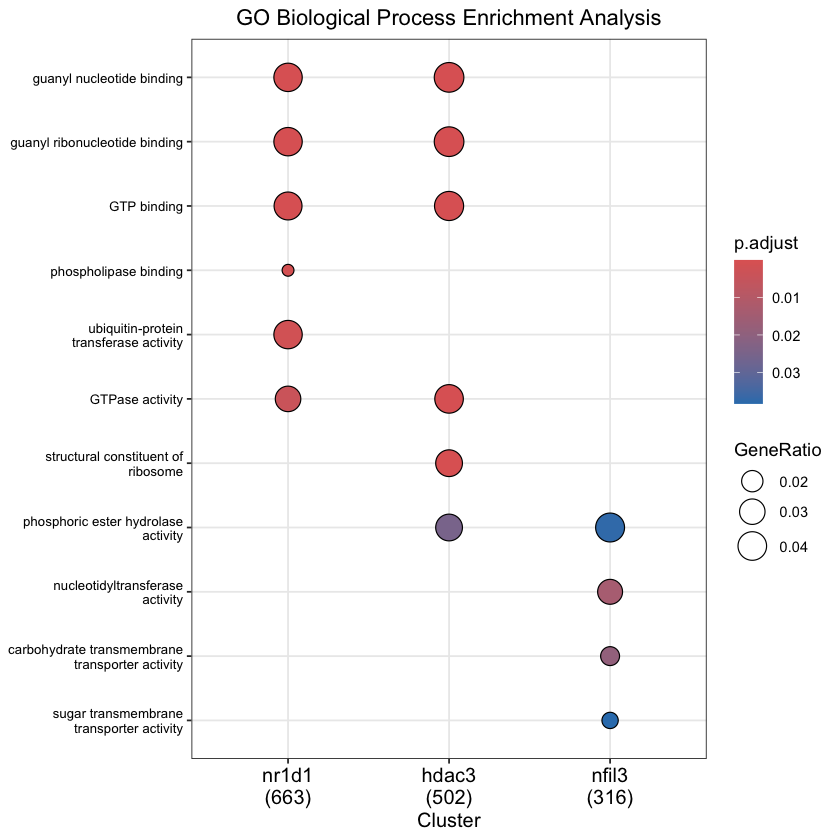

In [24]:
#pdf('GOdotplot_uniq.pdf')
dotplot(ck) +
  scale_color_gradient(low = "blue", high = "red", name = "p.adjust") +
  theme(axis.text.y = element_text(size = 8, hjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5)) +
  ggtitle("GO Biological Process Enrichment Analysis")
#dev.off()

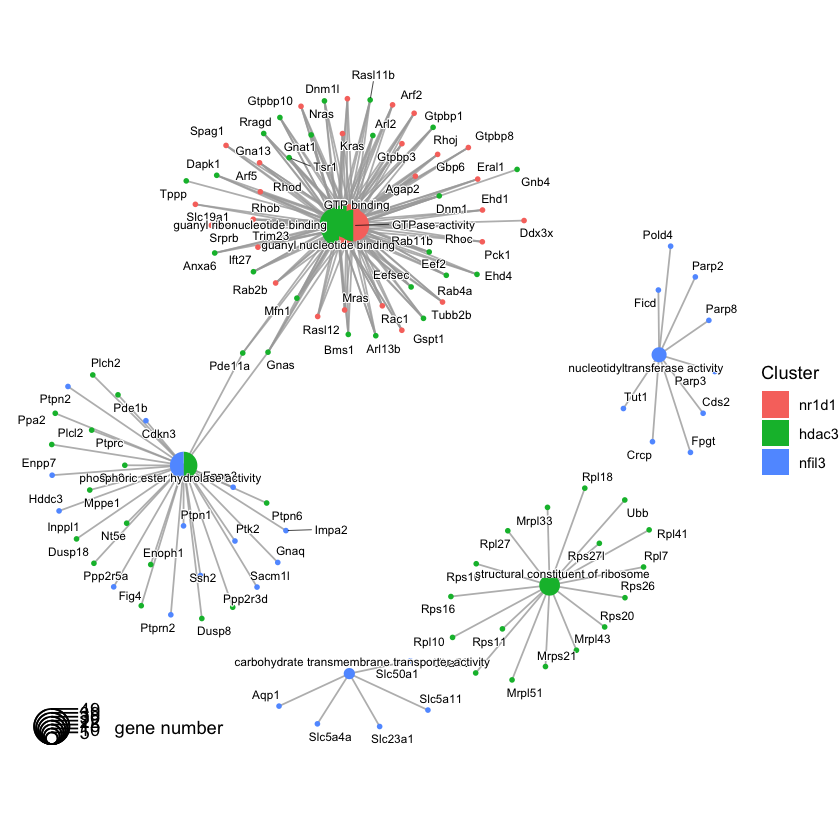

In [25]:
#pdf('GOnetwork_uniq.pdf')
cnetplot(ck,showCategory = 3)
#dev.off()

In [30]:
#run the same thing with dep_ID list

# Gene lists (assuming these are already read)
nr1d1_genes <- readLines("nr1d1_dep_geneID.txt")
hdac3_genes <- readLines("hdac3_dep_geneID.txt")
nfil3_genes <- readLines("nfil3_dep_geneID.txt")

# Convert SYMBOL to ENTREZID
nr1d1_entrez <- bitr(nr1d1_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")
hdac3_entrez <- bitr(hdac3_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")
nfil3_entrez <- bitr(nfil3_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")

gene_clusters <- list(
  nr1d1 = nr1d1_entrez$ENTREZID,
  hdac3 = hdac3_entrez$ENTREZID,
  nfil3 = nfil3_entrez$ENTREZID
)


# GO
enrichGO_custom <- function(gene) {
enrichGO(gene, OrgDb = org.Mm.eg.db, keyType = "ENTREZID", 
           pvalueCutoff = 0.01, pAdjustMethod = "BH", qvalueCutoff = 0.01)
}

# GO enrichment
ck <- compareCluster(geneCluster = gene_clusters, fun = enrichGO_custom)
ck <- setReadable(ck, OrgDb = org.Mm.eg.db, keyType = "ENTREZID")

head(ck)


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(nr1d1_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.17% of input gene IDs are fail to map..."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(hdac3_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.63% of input gene IDs are fail to map..."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(nfil3_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.28% of input gene IDs are fail to map..."


,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,nr1d1,GO:0005525,GTP binding,74/2365,363/28396,4.348103e-13,3.579176e-10,2.669617e-10,Agap2/Arf2/Arf3/Arf5/Arf6/Arl1/Arl15/Arl5c/Atl3/Cdc42/Ciita/Dnm1l/Dnm2/Ehd1/Ehd2/Eral1/Gbp3/Gbp4/Gbp5/Gbp6/Gbp7/Gbp8/Gbp9/Gimap6/Gmppb/Gna12/Gna14/Gnai2/Gspt1/Gtpbp1/Gtpbp10/Gtpbp3/Gtpbp6/Gtpbp8/Hbs1l/Igtp/Iigp1/Irgm2/Irgq/Kras/Mras/Mx2/Nkiras1/Nkiras2/Noa1/Pck1/Pck2/Rab10/Rab13/Rab14/Rab2b/Rab4a/Rab4b/Rabl2/Rac1/Rac3/Rala/Rap1a/Rasd1/Rasl12/Rheb/Rhoa/Rhob/Rhobtb2/Rhoc/Rhod/Rhov/Rras/Samhd1/Spag1/Srprb/Trim23/Tubb2a/Tubb5,74
2,nr1d1,GO:0051020,GTPase binding,70/2365,337/28396,7.295723e-13,3.579176e-10,2.669617e-10,Abca1/Als2cl/Ambra1/Ap1g1/Ap3m1/Arhgap1/Arhgdia/Arhgef7/Atg16l1/Atp6ap1/Becn1/Bicd1/Bin1/Birc5/Cdc42se1/Cib1/Clta/Cse1l/Cyfip1/Dapk3/Dnm1l/Dock9/Dvl2/Dvl3/Ehd1/Exoc2/Fmnl1/Gdi2/Git1/Hace1/Ipo11/Ipo4/Ipo7/Iqgap1/Iqgap3/Itpka/Kctd13/Kif16b/Kif3b/Map3k11/Micall2/Mycbp2/Nckap1/Nox1/Noxa1/Nup153/Nutf2/Odf2/Plk2/Prkch/Rab11fip3/Rabac1/Rac1/Raf1/Rap1a/Rgl3/Rilp/Rims2/Sh3bp4/Sorl1/Srgap1/Srgap2/Stx4a/Sytl2/Sytl3/Tnfaip1/Tnpo3/Vps4a/Was/Xpo4,70
3,nr1d1,GO:0003924,GTPase activity,65/2365,305/28396,1.429516e-12,3.579176e-10,2.669617e-10,Agap2/Arf2/Arf3/Arf5/Arf6/Arl1/Arl15/Arl5c/Atl3/Cdc42/Ddx3x/Dnm1l/Dnm2/Gbp3/Gbp4/Gbp5/Gbp6/Gbp7/Gbp8/Gbp9/Gm12250/Gm4841/Gna12/Gna14/Gnai2/Gng2/Gspt1/Gtpbp1/Gtpbp10/Gtpbp3/Hbs1l/Ifi47/Igtp/Iigp1/Irgm2/Kras/Mras/Mx2/Nkiras1/Nkiras2/Rab10/Rab13/Rab14/Rab2b/Rab4a/Rab4b/Rabl2/Rac1/Rac3/Rala/Rap1a/Rasd1/Rasl12/Rheb/Rhoa/Rhob/Rhobtb2/Rhoc/Rhod/Rhov/Rras/Tgtp2/Trim23/Tubb2a/Tubb5,65
4,nr1d1,GO:0019001,guanyl nucleotide binding,76/2365,387/28396,1.520466e-12,3.579176e-10,2.669617e-10,Agap2/Arf2/Arf3/Arf5/Arf6/Arl1/Arl15/Arl5c/Atl3/Cdc42/Ciita/Dnm1l/Dnm2/Dync1li1/Ehd1/Ehd2/Eral1/Gbp3/Gbp4/Gbp5/Gbp6/Gbp7/Gbp8/Gbp9/Gimap6/Gmppb/Gna12/Gna14/Gnai2/Gspt1/Gtpbp1/Gtpbp10/Gtpbp3/Gtpbp6/Gtpbp8/Hbs1l/Igtp/Iigp1/Irgm2/Irgq/Kras/Mras/Mx2/Nkiras1/Nkiras2/Noa1/Pck1/Pck2/Rab10/Rab13/Rab14/Rab2b/Rab4a/Rab4b/Rabl2/Rac1/Rac3/Rala/Rap1a/Rasd1/Rasl12/Rheb/Rhoa/Rhob/Rhobtb2/Rhoc/Rhod/Rhov/Rras/Samhd1/Slc19a1/Spag1/Srprb/Trim23/Tubb2a/Tubb5,76
5,nr1d1,GO:0032561,guanyl ribonucleotide binding,76/2365,387/28396,1.520466e-12,3.579176e-10,2.669617e-10,Agap2/Arf2/Arf3/Arf5/Arf6/Arl1/Arl15/Arl5c/Atl3/Cdc42/Ciita/Dnm1l/Dnm2/Dync1li1/Ehd1/Ehd2/Eral1/Gbp3/Gbp4/Gbp5/Gbp6/Gbp7/Gbp8/Gbp9/Gimap6/Gmppb/Gna12/Gna14/Gnai2/Gspt1/Gtpbp1/Gtpbp10/Gtpbp3/Gtpbp6/Gtpbp8/Hbs1l/Igtp/Iigp1/Irgm2/Irgq/Kras/Mras/Mx2/Nkiras1/Nkiras2/Noa1/Pck1/Pck2/Rab10/Rab13/Rab14/Rab2b/Rab4a/Rab4b/Rabl2/Rac1/Rac3/Rala/Rap1a/Rasd1/Rasl12/Rheb/Rhoa/Rhob/Rhobtb2/Rhoc/Rhod/Rhov/Rras/Samhd1/Slc19a1/Spag1/Srprb/Trim23/Tubb2a/Tubb5,76
6,nr1d1,GO:0031267,small GTPase binding,63/2365,297/28396,3.900293e-12,7.651075e-10,5.706745e-10,Abca1/Als2cl/Ap1g1/Ap3m1/Arhgap1/Arhgdia/Arhgef7/Atp6ap1/Bicd1/Birc5/Cdc42se1/Cib1/Cse1l/Cyfip1/Dapk3/Dnm1l/Dock9/Dvl2/Dvl3/Ehd1/Exoc2/Fmnl1/Gdi2/Git1/Hace1/Ipo11/Ipo4/Ipo7/Iqgap1/Iqgap3/Itpka/Kctd13/Kif16b/Kif3b/Map3k11/Micall2/Mycbp2/Nckap1/Nox1/Noxa1/Nup153/Nutf2/Odf2/Prkch/Rab11fip3/Rac1/Raf1/Rap1a/Rgl3/Rilp/Rims2/Sh3bp4/Sorl1/Srgap1/Srgap2/Stx4a/Sytl2/Sytl3/Tnfaip1/Tnpo3/Vps4a/Was/Xpo4,63


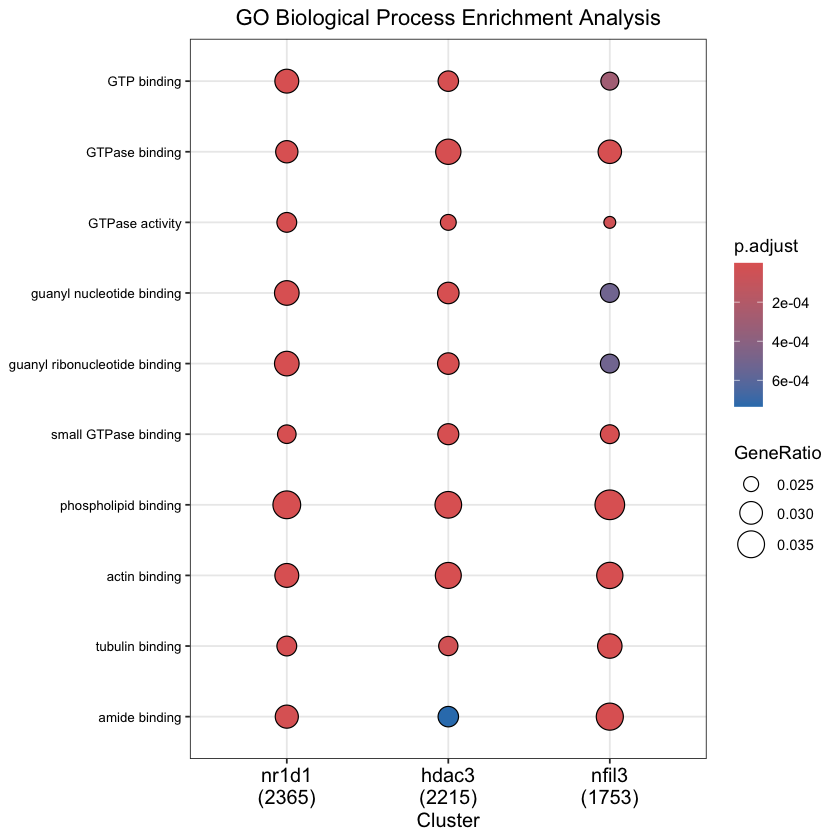

In [31]:
#pdf('GOdotplot_dep.pdf')
dotplot(ck) +
  scale_color_gradient(low = "blue", high = "red", name = "p.adjust") +
  theme(axis.text.y = element_text(size = 8, hjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5)) +
  ggtitle("GO Biological Process Enrichment Analysis")
#dev.off()


Warning message:
"ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


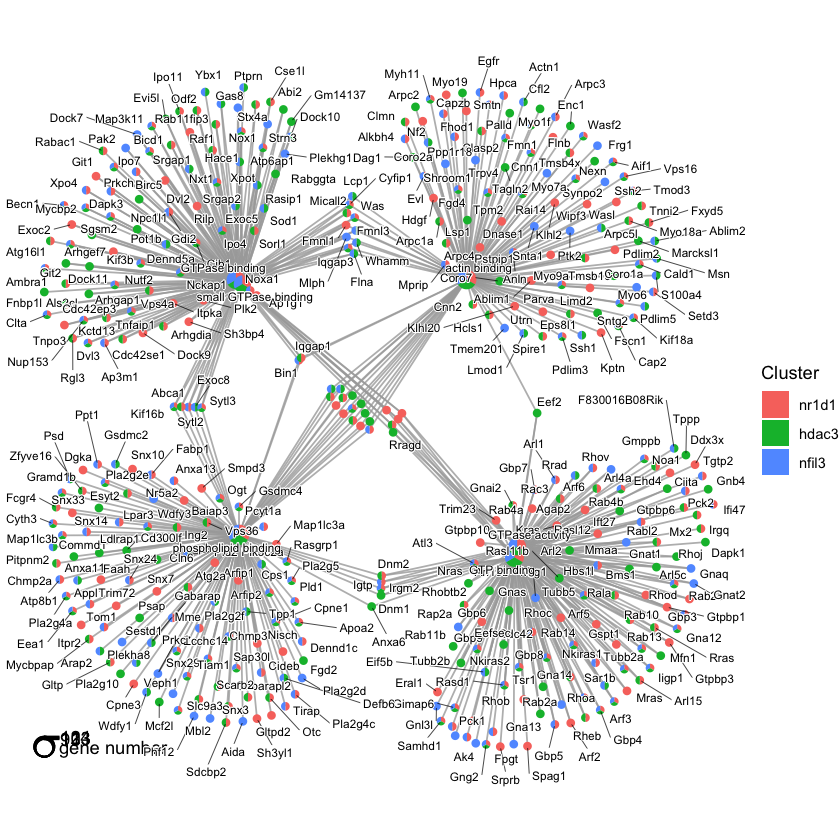

In [32]:
# pdf('GOnetwork_dep.pdf')
cnetplot(ck,showCategory = 3)
# dev.off()

In [ ]:
##RUN KEGG enrichment analysis with unique and dependent gene list

In [38]:
library(clusterProfiler)
library(org.Mm.eg.db)

# Gene lists (assuming these are already read)
nr1d1_genes <- readLines("nr1d1_uniq_ID.txt")
hdac3_genes <- readLines("hdac3_uniq_ID.txt")
nfil3_genes <- readLines("nfil3_uniq_ID.txt")

# Convert SYMBOL to ENTREZID
nr1d1_entrez <- bitr(nr1d1_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")
hdac3_entrez <- bitr(hdac3_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")
nfil3_entrez <- bitr(nfil3_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")

gene_clusters <- list(
  nr1d1 = nr1d1_entrez$ENTREZID,
  hdac3 = hdac3_entrez$ENTREZID,
  nfil3 = nfil3_entrez$ENTREZID
)

# KEGG
enrichKEGG_custom <- function(gene) {
  enrichKEGG(gene, organism = "mmu", keyType = "ncbi-geneid")
}

# KEGG_enrichment
ck <- compareCluster(geneCluster = gene_clusters, fun = enrichKEGG_custom)
ck <- setReadable(ck, OrgDb = org.Mm.eg.db, keyType = "ENTREZID")

# enrichment results
head(ck)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(nr1d1_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.11% of input gene IDs are fail to map..."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(hdac3_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.14% of input gene IDs are fail to map..."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(nfil3_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"10.7% of input gene IDs are fail to map..."


,Cluster,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,nr1d1,Human Diseases,Immune disease,mmu05340,Primary immunodeficiency - Mus musculus (house mouse),8/337,36/9779,2.379673e-05,0.0069724429,0.0058615112,Blnk/Cd3e/Cd8a/Il2rg/Jak3/Lck/Rfxank/Tnfrsf13b,8
2,nr1d1,Organismal Systems,Immune system,mmu04658,Th1 and Th2 cell differentiation - Mus musculus (house mouse),11/337,88/9779,2.060125e-04,0.0208472054,0.0175255832,Cd3e/Cd3g/Dll1/Ikbkb/Il2rg/Jak3/Lat/Lck/Mapk9/Runx3/Stat6,11
3,nr1d1,Organismal Systems,Immune system,mmu04659,Th17 cell differentiation - Mus musculus (house mouse),12/337,105/9779,2.526057e-04,0.0208472054,0.0175255832,Cd3e/Cd3g/Ebi3/Ikbkb/Il21r/Il2rg/Jak3/Lat/Lck/Mapk9/Stat6/Tgfb1,12
4,nr1d1,Organismal Systems,Immune system,mmu04660,T cell receptor signaling pathway - Mus musculus (house mouse),13/337,122/9779,2.846035e-04,0.0208472054,0.0175255832,Cd3e/Cd3g/Cd8a/Ikbkb/Itk/Kras/Lat/Lck/Map2k2/Mapk9/Pik3cd/Ppp2r1b/Ppp2r5c,13
5,nr1d1,Cellular Processes,Transport and catabolism,mmu04144,Endocytosis - Mus musculus (house mouse),21/337,270/9779,4.171030e-04,0.0244422380,0.0205478128,Acap1/Acap3/Agap2/Arf2/Arf5/Chmp7/Cyth4/Ehd1/Git1/H2-Q6/H2-T22/Hspa1b/Il2rg/Prkcz/Rab11fip3/Rab4a/Smurf2/Src/Wasl/Wipf3/Wwp1,21
6,hdac3,Environmental Information Processing,Signal transduction,mmu04151,PI3K-Akt signaling pathway - Mus musculus (house mouse),26/251,367/9779,2.489180e-06,0.0007268406,0.0005581004,Ccnd2/Ccne1/Creb3l1/Csf1/Ddit4/Ereg/Gnb4/Gng10/Gys1/Ifnar2/Il7/Il7r/Itga1/Itga2/Itga8/Itga9/Kdr/Lpar6/Mapk3/Nras/Osmr/Pdpk1/Ppp2r3d/Prkaa2/Sgk2/Ywhae,26


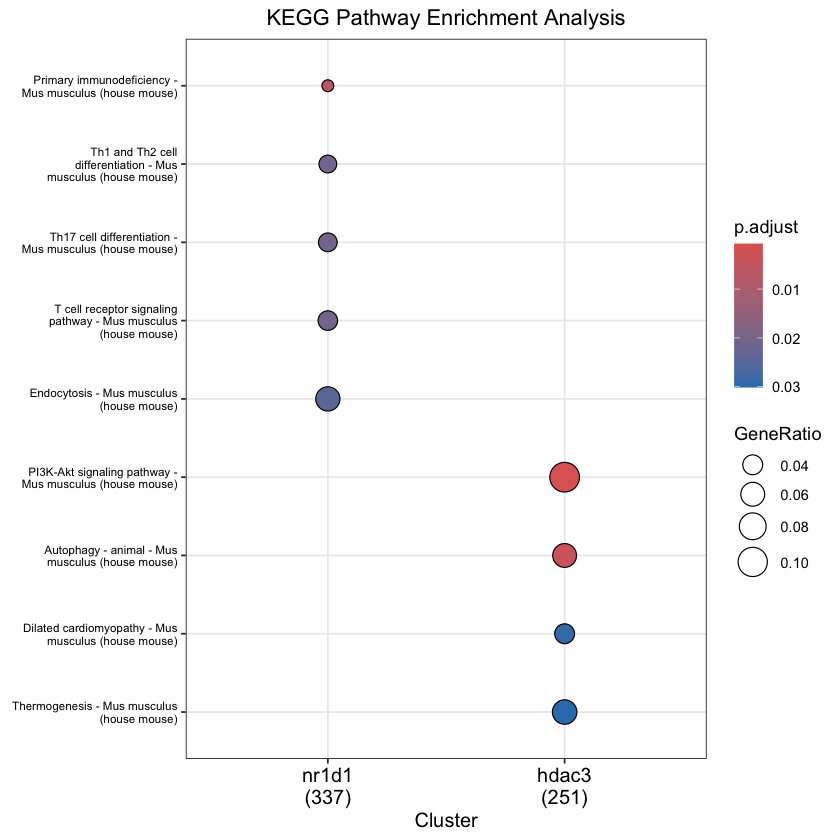

In [40]:
library(ggplot2)
# plot
#pdf('KEGGdotplot_dep.pdf')
dotplot(ck) +
  scale_color_gradient(low = "blue", high = "red", name = "p.adjust") +
  theme(axis.text.y = element_text(size = 7, hjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5)) +
  ggtitle("KEGG Pathway Enrichment Analysis")
#dev.off()

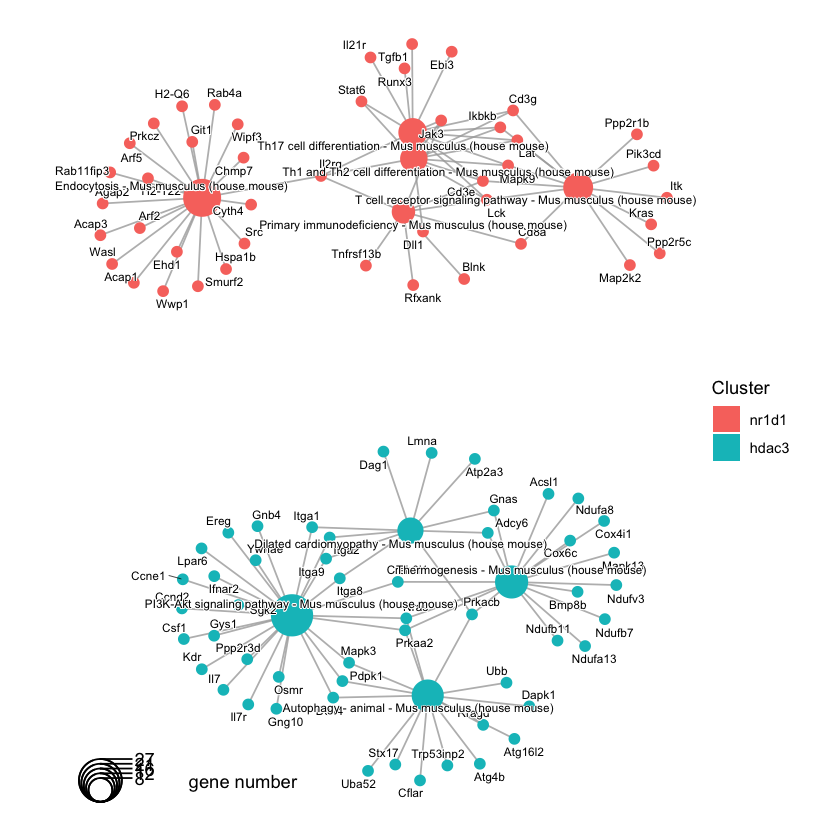

In [39]:
cnetplot(ck)

In [33]:
library(clusterProfiler)
library(org.Mm.eg.db)

# Gene lists (assuming these are already read)
nr1d1_genes <- readLines("nr1d1_dep_geneID.txt")
hdac3_genes <- readLines("hdac3_dep_geneID.txt")
nfil3_genes <- readLines("nfil3_dep_geneID.txt")

# Convert SYMBOL to ENTREZID
nr1d1_entrez <- bitr(nr1d1_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")
hdac3_entrez <- bitr(hdac3_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")
nfil3_entrez <- bitr(nfil3_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Mm.eg.db")

gene_clusters <- list(
  nr1d1 = nr1d1_entrez$ENTREZID,
  hdac3 = hdac3_entrez$ENTREZID,
  nfil3 = nfil3_entrez$ENTREZID
)

# KEGG
enrichKEGG_custom <- function(gene) {
  enrichKEGG(gene, organism = "mmu", keyType = "ncbi-geneid")
}

# KEGG_enrichment
ck <- compareCluster(geneCluster = gene_clusters, fun = enrichKEGG_custom)
ck <- setReadable(ck, OrgDb = org.Mm.eg.db, keyType = "ENTREZID")

# enrichment results
head(ck)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(nr1d1_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.17% of input gene IDs are fail to map..."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(hdac3_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.63% of input gene IDs are fail to map..."
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(nfil3_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"13.28% of input gene IDs are fail to map..."


,Cluster,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,nr1d1,Cellular Processes,Transport and catabolism,mmu04144,Endocytosis - Mus musculus (house mouse),67/1139,270/9779,7.974451e-10,2.679415e-07,2.098540e-07,Acap1/Acap3/Agap2/Arf2/Arf3/Arf5/Arf6/Arpc1a/Arpc3/Arpc4/Bin1/Cblc/Cdc42/Chmp2a/Chmp3/Chmp4b/Chmp5/Chmp7/Clta/Cltb/Cxcr2/Cyth3/Cyth4/Dnm2/Eea1/Egfr/Ehd1/Ehd2/Eps15/Fgfr2/Fgfr3/Git1/Grk4/H2-Bl/H2-K1/H2-M3/H2-Q1/H2-Q2/H2-Q6/H2-Q7/H2-T22/H2-T23/H2-T24/Hspa1a/Hspa1b/Il2rg/Pip5k1a/Pld1/Prkcz/Rab10/Rab11fip3/Rab4a/Rabep1/Rhoa/Smurf2/Snf8/Snx3/Src/Tfrc/Tsg101/Vps36/Vps37a/Vps4a/Wasl/Wipf3/Wwp1/Zfyve16,67
2,nr1d1,Cellular Processes,Cell growth and death,mmu04218,Cellular senescence - Mus musculus (house mouse),47/1139,182/9779,7.630841e-08,1.281981e-05,1.004058e-05,Atm/Atr/Calml4/Capn2/Ccna2/Ccnd1/Ccne2/Chek2/E2f1/Eif4ebp1/Foxm1/Foxo1/Foxo3/Gata4/H2-Bl/H2-K1/H2-M3/H2-Q1/H2-Q2/H2-Q6/H2-Q7/H2-T22/H2-T23/H2-T24/Hipk1/Itpr2/Kras/Lin37/Lin52/Lin54/Lin9/Map2k2/Mras/Nbn/Pik3cb/Pik3cd/Ppp1cb/Ppp3r1/Rad1/Raf1/Rassf5/Rbl1/Rela/Rheb/Rras/Sqstm1/Tgfb1,47
3,nr1d1,Human Diseases,Infectious disease: bacterial,mmu05132,Salmonella infection - Mus musculus (house mouse),57/1139,252/9779,4.533316e-07,5.077314e-05,3.976593e-05,Abi1/Ahnak/Arf2/Arf6/Arpc1a/Arpc3/Arpc4/Casp3/Cdc42/Cse1l/Cyfip1/Cyth3/Cyth4/Dctn4/Dnm2/Dync1li1/Dynll1/Dynlt3/Exoc2/Fhod1/Gapdh/Ikbkb/Il18/Klc1/Klc3/Klc4/Kpna4/Map2k2/Map2k4/Mapk9/Myl9/Naip5/Nckap1/Nod1/Pik3cb/Pik3cd/Rac1/Raf1/Rala/Rela/Rhoa/Rhob/Rilp/Ripk2/Rras/S100a10/Snx33/Tcf7/Tcf7l1/Tirap/Tnfrsf10b/Tradd/Tubb2a/Tubb5/Txn1/Vps16/Wasl,57
4,nr1d1,Human Diseases,Immune disease,mmu05340,Primary immunodeficiency - Mus musculus (house mouse),15/1139,36/9779,4.641850e-06,3.899154e-04,3.053849e-04,Blnk/Cd19/Cd3d/Cd3e/Cd4/Cd8a/Ciita/Il2rg/Jak3/Lck/Rfxank/Tap1/Tnfrsf13b/Ung/Zap70,15
5,nr1d1,Organismal Systems,Immune system,mmu04658,Th1 and Th2 cell differentiation - Mus musculus (house mouse),24/1139,88/9779,4.499244e-05,2.622222e-03,2.053745e-03,Cd3d/Cd3e/Cd3g/Cd4/Dll1/H2-Aa/H2-DMb2/Ifngr1/Ikbkb/Il12rb2/Il2rg/Jak3/Lat/Lck/Mapk9/Ppp3r1/Rbpj/Rela/Runx3/Stat1/Stat4/Stat5a/Stat6/Zap70,24
6,nr1d1,Organismal Systems,Immune system,mmu04660,T cell receptor signaling pathway - Mus musculus (house mouse),30/1139,122/9779,4.682539e-05,2.622222e-03,2.053745e-03,Bcl10/Cd3d/Cd3e/Cd3g/Cd4/Cd8a/Cdc42/Grap2/Ikbkb/Itk/Kras/Lat/Lck/Lcp2/Map2k2/Mapk9/Pak4/Pik3cb/Pik3cd/Ppp2r1b/Ppp2r2d/Ppp2r3c/Ppp2r5b/Ppp2r5c/Ppp3r1/Raf1/Rasgrp1/Rela/Rhoa/Zap70,30


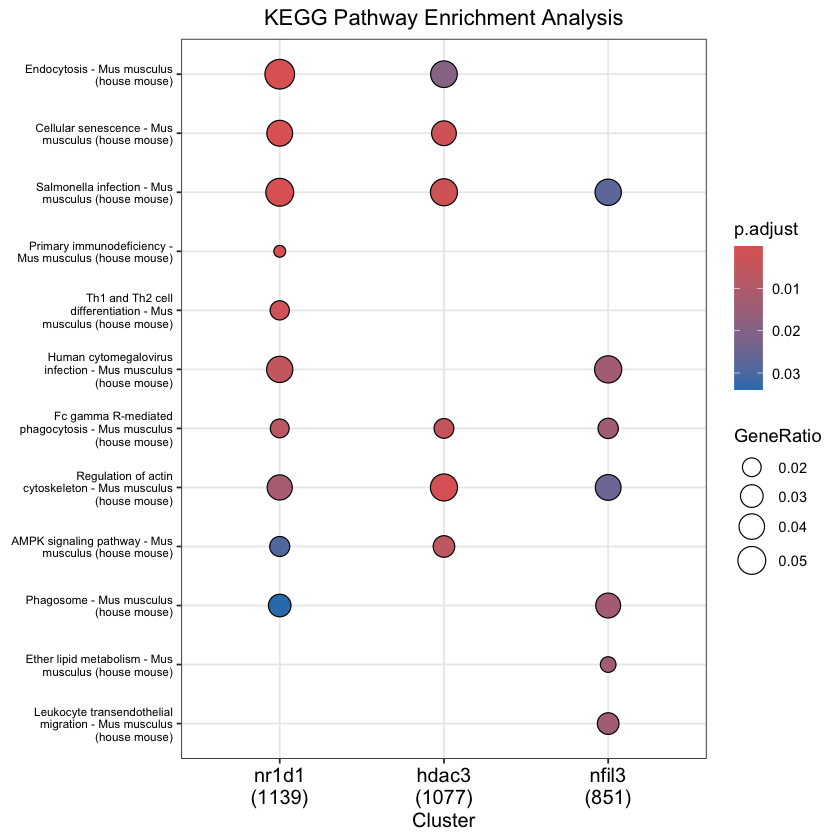

In [36]:
library(ggplot2)
# plot
#pdf('KEGGdotplot_dep.pdf')
dotplot(ck) +
  scale_color_gradient(low = "blue", high = "red", name = "p.adjust") +
  theme(axis.text.y = element_text(size = 7, hjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5)) +
  ggtitle("KEGG Pathway Enrichment Analysis")
#dev.off()


Warning message:
"ggrepel: 78 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


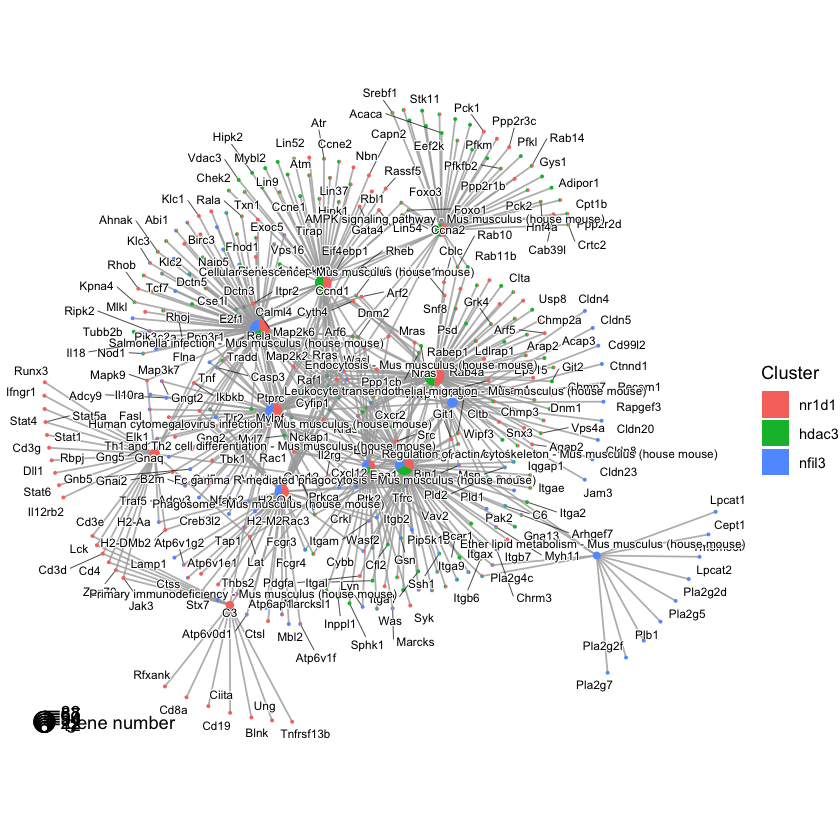

In [37]:
#pdf('KEGGnetwork_dep.pdf')
cnetplot(ck)
#dev.off()